In [9]:
# https://zhuanlan.zhihu.com/p/437747308

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
MARKERS =['s', 'D', 'X', 'o', 'P']

data = {}
data["Number of Background Flows"] = []
data["Throughput Ratio"] = []
data["Compete CC"] = []

data_ratios = {}

def calculate_ratio(compete_cc):

    root_dir = f'../record/local/monax_{compete_cc}/' 
    throughtput_ratios= []
    for i in range(16):
        flow_number = i+1
        base_dir = root_dir + f"monax-{compete_cc}-{flow_number}-same"
        file_list = os.listdir(base_dir)
        file_list.sort()

        flow = {}
        throughput = {}
        for file in file_list:
            if('csv' in file):
                flow_id = int(file.split('_')[1])
                CC = file.split('_')[2]
                df = pd.read_csv(os.path.join(base_dir,file))
                time = df['time'].values
                delivery_rate = df['delivery_rate']

                if(CC not in throughput):
                    throughput[CC] = []
                throughput[CC].append(np.average(delivery_rate))

        throughput_avg = {}      
        for cc in throughput:
            throughput_avg[cc] = np.average(throughput[cc]) 
        throughput_ratio = round(throughput_avg["monax"] / throughput_avg[compete_cc], 3)
    
        throughtput_ratios.append(throughput_ratio)
        
        data["Number of Background Flows"] += [i]
        data["Throughput Ratio"] += [throughput_ratio]
        data["Compete CC"] += [compete_cc]
        
    return throughtput_ratios

data_ratios["Cubic"] = calculate_ratio("cubic")
data_ratios["BBR"] = calculate_ratio("bbr")
data_ratios["PCC Vivace"] = calculate_ratio("pcc-vivace")
data_ratios["PCC Allegro"] = calculate_ratio("pcc-allegro")
    
print("Monax - Cubic: ", data_ratios["Cubic"])
print("Monax - BBR: ", data_ratios["BBR"] )
print("Monax - PCC Vivace: ", data_ratios["PCC Vivace"])  
print("Monax - PCC Allegro: ", data_ratios["PCC Allegro"]) 
# print("Monax - Vegas: ", calculate_ratio("vegas")) 
# print(data)

Monax - Cubic:  [0.708, 0.701, 0.881, 0.935, 0.951, 0.992, 1.211, 1.013, 0.998, 1.025, 1.107, 1.028, 1.113, 1.093, 1.057, 1.149]
Monax - BBR:  [0.756, 0.877, 1.393, 1.815, 2.279, 2.438, 2.701, 2.862, 3.247, 3.539, 3.813, 4.013, 4.248, 4.517, 4.744, 4.761]
Monax - PCC Vivace:  [4.992, 7.257, 0.914, 0.983, 0.963, 1.499, 1.07, 1.029, 1.16, 1.081, 1.31, 1.305, 1.264, 1.318, 1.256, 1.359]
Monax - PCC Allegro:  [1.034, 0.996, 0.997, 1.053, 1.055, 1.09, 1.077, 1.104, 1.278, 1.096, 1.363, 1.085, 1.148, 1.217, 1.346, 1.261]


In [12]:
# # X_LIMIT = (0, 240)
# # Y_LIMIT = (0, 20)

# sns.set(font_scale=2)
# sns.set_style("whitegrid")


# g = sns.relplot(x="Number of Background Flows", y="Throughput Ratio", hue="Compete CC", style="Compete CC", height=8, aspect=15/8,
#                 palette = COLORS[0:4], markers=MARKERS[0:4], linewidth = 5,
#                 estimator=None, kind="line", data=data)

# # sns.scatterplot(x = 'Number of Background Flows', y = 'Throughput Ratio', hue="Compete CC", style="Compete CC", markers=['s', 'D', 'X', 'o', 'P'], data = data, s=500)

# # g._legend.set_title("  ")

# for lh in g._legend.legendHandles: 
#     lh.set_alpha(2)
#     lh._sizes = [1000] 
#     lh._linewidth = 4
    
# # g.set(xlim=X_LIMIT,ylim=Y_LIMIT)
# g.set_ylabels(fontsize=30)
# g.set_xlabels(fontsize=30)

# g.savefig("./ratio.png", dpi = 400)    

In [13]:
data_ratios["Cubic"] = calculate_ratio("cubic")
data_ratios["BBR"] = calculate_ratio("bbr")
data_ratios["PCC Vivace"] = calculate_ratio("pcc-vivace")
data_ratios["PCC Allegro"] = calculate_ratio("pcc-allegro")

print(data_ratios["BBR"])

def scale_process(value):         
    if(value>0.5 and value<=1):       
        return (value-0.5)/(1-0.5) 
    elif(value>1 and value<=1.5):      
        return (value-1)/(1.5-1) + 1 
    elif(value>1.5 and value<=2):       
        return (value-1.5)/(2-1.5) + 2
    elif(value>2):                      
        return (value-2)/(10-2) + 3
    
    return None

def scale_process_new(value):
    return np.power((value-0.5), 0.25)

for cc in data_ratios:
    for i in range(len(data_ratios[cc])):
#         data_ratios[cc][i] = (data_ratios[cc][i]-1)/9 + 1 if data_ratios[cc][i]>1 else data_ratios[cc][i]
        data_ratios[cc][i] = scale_process(data_ratios[cc][i])
    
print(data_ratios["BBR"])

[0.756, 0.877, 1.393, 1.815, 2.279, 2.438, 2.701, 2.862, 3.247, 3.539, 3.813, 4.013, 4.248, 4.517, 4.744, 4.761]
[0.512, 0.754, 1.786, 2.63, 3.034875, 3.05475, 3.087625, 3.1077500000000002, 3.155875, 3.192375, 3.226625, 3.2516249999999998, 3.281, 3.314625, 3.343, 3.345125]


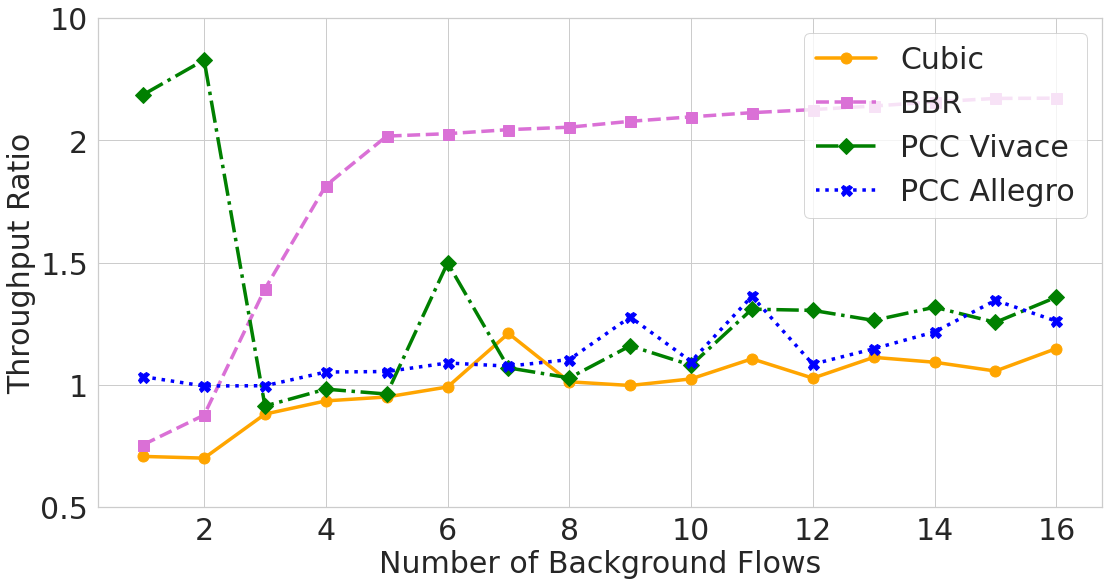

In [15]:
MARKER_SIZE = 11
LINE_WIDTH = 3.5


fig, axes = plt.subplots(1, 1, figsize=(18, 9))

x = list(range(1,17))


# 折线图
axes.plot(x, data_ratios["Cubic"], linestyle='-', color='orange', label="Cubic", marker='o', markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
axes.plot(x, data_ratios["BBR"], linestyle='--', color='orchid', label="BBR", marker='s', markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
axes.plot(x, data_ratios["PCC Vivace"], linestyle='-.', color='green', label="PCC Vivace", marker='D', markersize=MARKER_SIZE, linewidth=LINE_WIDTH)
axes.plot(x, data_ratios["PCC Allegro"], linestyle=':', color='blue', label="PCC Allegro", marker='X', markersize=MARKER_SIZE, linewidth=LINE_WIDTH)

plt.legend(loc=1, fontsize=30)
y = [0, 1, 2, 3, 4]
y_index = [0.5, 1, 1.5, 2, 10]
plt.yticks(y,y_index)  

# # 设置最小刻度间隔
# axes.yaxis.set_minor_locator(MultipleLocator(2.5))
# axes.xaxis.set_minor_locator(MultipleLocator(0.5))
# 画网格线
axes.grid(which='minor', c='lightgrey')

#设置坐标标签标注和字体大小
plt.xlabel("Number of Background Flows",fontsize=30)
plt.ylabel("Throughput Ratio",fontsize=30)

#设置坐标刻度字体大小
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# # 设置y轴的刻度
# axes.set_yticks([70, 75, 80, 85, 90, 95])
# 对每个数据点加标注
# for x_, y_ in zip(x, y):
#     axes.text(x_, y_, y_, ha='left', va='bottom')
# for x_, y_ in zip(x, y2):
#     axes.text(x_, y_, y_, ha='left', va='bottom')
# 展示图片

plt.savefig("ratio.png", bbox_inches = 'tight')
plt.show()